In [2]:
# linear regression 

import math ,time, torch,numpy as np 
from d2l import torch as d2l


#### Key Takeaways: Linear Regression Basics

- **Linear regression** is the simplest and most widely used regression method.
- It has a **strong mathematical foundation**, dating back to **Gauss and Legendre (1800s)**.
- It assumes an **approximately linear relationship** between:
  - **Features** \( X \)
  - **Target** \( y \)

- The **expected output** is a weighted sum of input features:
  $$
  \mathbb{E}[Y \mid X = x] = Xw
  $$

- **Real-world data is noisy**, so actual values deviate from expected values.
- The noise is assumed to be **Gaussian (normal)** and well-behaved.

- \( n \) denotes the **number of data samples**.
- **Superscripts** \( (i) \) index **samples (rows)**.
- **Subscripts** \( (j) \) index **features (columns)**.
- \( x_j^{(i)} \) means the **j-th feature of the i-th sample**.



### Key Takeaways: Linear Regression Model (with Examples)

- A **model** is a rule that transforms **features (inputs)** into a **prediction (output)**.

- Linear regression assumes the target is a **weighted sum of features plus a bias**.
  
  **Example (house price):**
  $$
  \text{price} = w_{\text{area}} \cdot \text{area} + w_{\text{age}} \cdot \text{age} + b
  $$

- **Weights (\(w\))** measure the **influence of each feature** on the prediction.
  
  **Example:**  
  If \( w_{\text{area}} = 5000 \), each extra square meter increases price by 5000 units.

- **Bias (\(b\))** shifts the prediction up or down and allows the model to fit real data.
  
  **Example:**  
  Even when area and age are zero, \( b \) sets a base price.

- Linear regression is technically an **affine transformation**:
  - Linear part: \( w^\top x \)
  - Translation: \( + b \)

- With many features (\( d \)):
  $$
  \hat{y} = w_1 x_1 + w_2 x_2 + \cdots + w_d x_d + b
  $$

- Using vectors makes the model compact and scalable:
  $$
  \hat{y} = \mathbf{w}^\top \mathbf{x} + b
  $$

  **Example:**  
- Feature vector x = [area, age]
- Weight vector w = [w_area, w_age]


- For a dataset with \( n \) samples and \( d \) features, features are stored in a **design matrix**:
  $$
  \mathbf{X} \in \mathbb{R}^{n \times d}
  $$

- Predictions for all samples are computed at once:
  $$
  \hat{\mathbf{y}} = \mathbf{X}\mathbf{w} + b
  $$

- Real-world data is **noisy**, so predictions are never perfectly exact:
  $$
  y = \mathbf{w}^\top x + b + \text{noise}
  $$

- The goal of linear regression is to **find the best weights and bias** that minimize prediction error **on average**.

---

### One-Line Intuition
> Linear regression predicts by summing feature contributions, shifting with a bias, and fitting parameters to minimize error.


### Key Takeaways: Loss Function (Linear Regression)

- A **loss function** measures how well a model’s predictions match the true target values.
- Loss values are **non-negative**; smaller loss means a better model.
- For regression, the most common loss is the **squared error loss**.

- For a single training example i, the loss is:
$$
\ell^{(i)}(w, b) = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2
$$

- Squaring the error penalizes large mistakes more heavily and avoids error cancellation.
- The factor 1/2 is added only for mathematical convenience; it simplifies derivatives.

- The vertical distance between the predicted value and the true value represents the error.
- Larger prediction errors contribute much more to the loss because of the square.

- To evaluate the model on the entire dataset with n samples, we average the losses:
$$
L(w, b) = \frac{1}{n} \sum_{i=1}^{n} \ell^{(i)}(w, b)
$$

- Substituting the linear model into the loss gives:
$$
L(w, b) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{2}\left(w^\top x^{(i)} + b - y^{(i)}\right)^2
$$

- Training a linear regression model means finding the parameters that minimize the total loss:
$$
w^*, b^* = \arg\min_{w, b} L(w, b)
$$

- Because real-world data is noisy, the loss can never be exactly zero for all samples.

---

### One-Line Intuition
The loss function measures prediction error, and training adjusts the model parameters to minimize the average squared error.


### Analytic Solution vs Gradient Descent (Simple Comparison)

| Aspect | Analytic Solution | Gradient Descent |
|------|------------------|------------------|
| Idea | Solve using a direct formula | Improve step-by-step |
| How it works | One-shot calculation | Iterative updates |
| Formula | Closed-form expression | Uses gradients |
| Speed | Fast for small data | Slower but scalable |
| Memory | High (matrix inversion) | Low |
| Large datasets | Not practical | Works well |
| High dimensions | Breaks easily | Handles millions |
| Bias handling | Absorbed into matrix | Learned naturally |
| Requires invertibility | Yes (XᵀX must invert) | No |
| Used in deep learning | ❌ No | ✅ Yes |
| Global minimum | Guaranteed (if exists) | Yes for convex problems |
| Implementation | Linear algebra heavy | Simple loop |

---

### Intuition (no math)
- **Analytic solution**:  
  “Let me calculate the best answer in one shot.”

- **Gradient descent**:  
  “Let me slowly walk downhill until error is minimal.”

---

### Real-world analogy
- **Analytic** → Solving a small equation with a calculator  
- **Gradient Descent** → Adjusting a knob repeatedly until sound is perfect

---

### When to use what?
- Use **analytic solution**:
  - Small dataset
  - Few features
  - For understanding theory

- Use **gradient descent**:
  - Large data
  - Many features
  - Neural networks
  - Real ML systems

---

### One-line takeaway
> Analytic solution is elegant but limited; gradient descent is slower but powers modern machine learning.


### Key Takeaways: GD vs SGD vs Mini-batch SGD

- A training dataset consists of n examples, where each example is a pair \((x^{(i)}, y^{(i)})\).

- The model prediction for one example is:
$$
\hat{y}^{(i)} = w^\top x^{(i)} + b
$$

- The loss for one example measures prediction error:
$$
\ell^{(i)}(w, b) = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2
$$

- **Full Gradient Descent (GD)**:
  - Uses all n examples to compute one update.
  - One update is accurate but expensive.
  - Becomes very slow for large datasets.

- **Stochastic Gradient Descent (SGD)**:
  - Uses one example per update.
  - Very fast updates but highly noisy.
  - Learning can be unstable.

- **Mini-batch SGD**:
  - Uses a small batch of examples per update.
  - Balances speed, stability, and efficiency.
  - This is the method used in practice.

- The mini-batch loss is:
$$
L_B(w, b) = \frac{1}{|B|} \sum_{i \in B} \ell^{(i)}(w, b)
$$

- The parameter update rule (general form):
$$
w \leftarrow w - \eta \times (\text{average gradient over chosen samples})
$$

- The learning rate \(\eta\) controls the step size and is a hyperparameter.

---

### One-Line Intuition
Training means repeatedly moving parameters in the direction that reduces loss, using all, one, or a few samples at a time.


### Key Takeaways: Predictions in Linear Regression

- After training, we use the **estimated parameters** to make predictions on new data.

- The prediction formula is:
$$
\hat{y} = \hat{w}^\top x + \hat{b}
$$

- ŵ represents the **estimated (learned) weights**.
- b̂ represents the **estimated (learned) bias**.
- The **hat (ˆ)** symbol indicates an estimate obtained from training data.

- \( x \) is the feature vector of a **new, unseen example**.
- The transpose w^⊤x+b^ allows a **dot product** with \( x \).

- The prediction is simply a **weighted sum of input features plus bias**.

- In practice, deep learning often calls prediction **inference**, but this term is ambiguous.
- To avoid confusion, it is clearer to use the term **prediction** for computing outputs on new data.

---

### One-Line Intuition
Prediction means plugging new input data into the learned model to compute an output.


### Vectorization for Speed

In [3]:
# Vectorization for Speed

n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [4]:
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
    # print(len(c))
    # break
f'{time.time() - t:.5f} sec'

'0.05518 sec'

In [5]:
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00000 sec'

### The normal distribution and squared loss



A normal distribution is a symmetric, bell-shaped probability distribution defined by a mean (μ) and standard deviation (σ), where most values cluster around the mean and extreme values are rare.

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

Variable Breakdown
- f(x): Probability density
- x: The variable (or data point)
- μ (mu): The mean (average)
- σ (sigma): The standard deviation
- σ²: The variance

In [6]:
## formula to function 

def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

[9.13472041e-12 9.79657253e-12 1.05053283e-11 ... 1.12642341e-11
 1.05053283e-11 9.79657253e-12]
[0.00043634 0.00044404 0.00045186 ... 0.00045981 0.00045186 0.00044404]
[7.69459863e-23 8.50342145e-23 9.39632453e-23 ... 1.50825272e-04
 1.44947560e-04 1.39284976e-04]


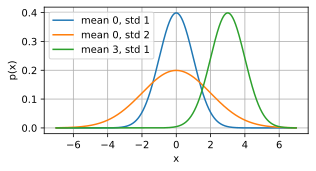

In [40]:
import matplotlib.pyplot as plt
x = np.arange(-7,7,0.01)

params = [(0,1),(0,2),(3,1)] # mean and std pairs



# Plot
plt.figure(figsize=(4.5, 2.5))

for mu, sigma in params:
    y = normal(x, mu, sigma)
    print(y)
    plt.plot(x, y, label=f'mean {mu}, std {sigma}')
    

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
import numpy as np

mu_vals = np.arange(-3, 4, 1)      # means: -3 to 3
sigma_vals = [0.5, 1.0, 2.0]       # std must be > 0

params = [(mu, sigma) for mu in mu_vals for sigma in sigma_vals]

print(params)

[(-3, 0.5), (-3, 1.0), (-3, 2.0), (-2, 0.5), (-2, 1.0), (-2, 2.0), (-1, 0.5), (-1, 1.0), (-1, 2.0), (0, 0.5), (0, 1.0), (0, 2.0), (1, 0.5), (1, 1.0), (1, 2.0), (2, 0.5), (2, 1.0), (2, 2.0), (3, 0.5), (3, 1.0), (3, 2.0)]


#### Squared Loss

Squared loss measures how far your prediction is from the true value by squaring the error.

Squared Loss = (y- ŷ)^2


In [41]:
import numpy as np

y = np.array([3.0, 5.0, 7.0])        # true values
y_hat = np.array([2.5, 4.0, 8.0])    # predictions

squared_loss = (y - y_hat)**2
mse = squared_loss.mean()

print(squared_loss)
print(mse)


[0.25 1.   1.  ]
0.75
